<a href="https://colab.research.google.com/github/ivondf68-eng/Aulas-dados-python/blob/main/Aula_3_Cria%C3%A7%C3%A3o_de_Gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando a biblioteca pandas para manipulação de dados
import pandas as pd
# Carrega os dados de um arquivo CSV de uma URL para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [2]:
# Mapeia os nomes das colunas originais para os novos nomes em português
new_column_names = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}
# Renomeia as colunas do DataFrame com base no dicionário 'new_column_names'
df = df.rename(columns=new_column_names)
print("Colunas do DataFrame traduzidas para português:")
print(df.columns.tolist())

Colunas do DataFrame traduzidas para português:
['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd', 'residencia', 'remoto', 'empresa', 'tamanho_empresa']


In [3]:
# Exibe as primeiras linhas do DataFrame para inspeção inicial
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
# Remove linhas com valores ausentes do DataFrame
df_limpo = df.dropna()

In [9]:
# Exibe as primeiras linhas do DataFrame após a remoção de valores ausentes
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [10]:
# Converte a coluna 'ano' para o tipo inteiro
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

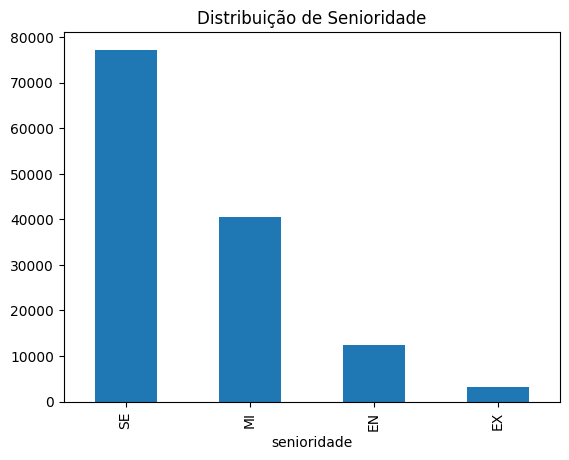

In [12]:

# Gera um gráfico de barras da distribuição de senioridade
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')

In [16]:
# Importa a biblioteca seaborn para visualização de dados
import seaborn as sns

In [17]:
# Mapeia os códigos de senioridade para descrições mais legíveis
df_limpo['senioridade'] = df['senioridade'].map({
    'EN': 'Junior',
    'MI': 'Pleno',
    'SE': 'Sênior',
    'EX': 'Executivo'})

<Axes: xlabel='senioridade', ylabel='usd'>

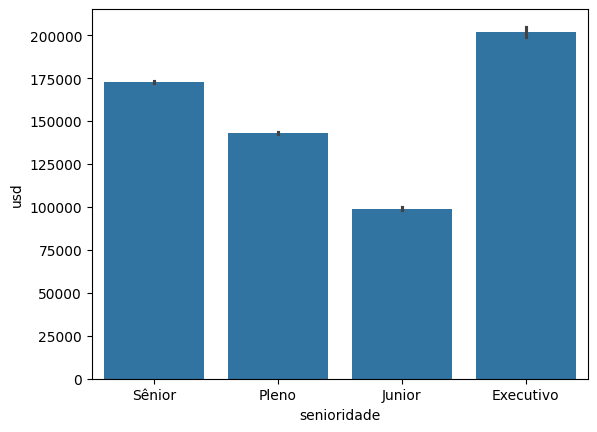

In [18]:
# Cria um gráfico de barras mostrando o salário médio por senioridade
sns.barplot(data = df_limpo, x = 'senioridade', y = 'usd')

In [19]:
# Importa a biblioteca matplotlib para criação de gráficos
import matplotlib.pyplot as plt

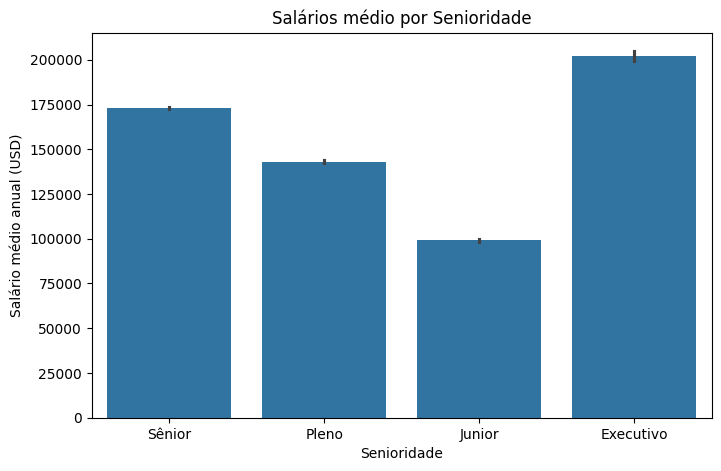

In [21]:
# Define o tamanho e os eixos do gráfico
plt.figure(figsize=(8,5))
sns.barplot(data = df_limpo, x = 'senioridade', y = 'usd')
plt.title('Salários médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

In [22]:
# Calcula a média do salário (usd) agrupado por senioridade e ordena em ordem decrescente
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Sênior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [23]:
# Ordena os valores do maior para o menor com base na média salarial por senioridade
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

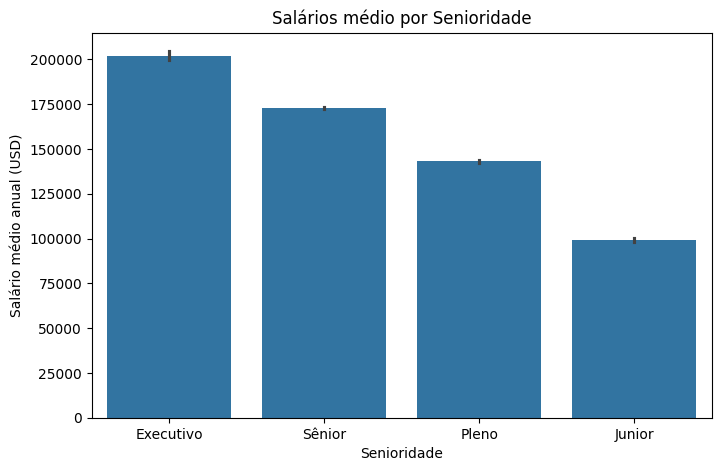

In [24]:
# Cria um gráfico de barras mostrando o salário médio por senioridade, ordenado
plt.figure(figsize=(8,5))
sns.barplot(data = df_limpo, x = 'senioridade', y = 'usd', order=ordem)
plt.title('Salários médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

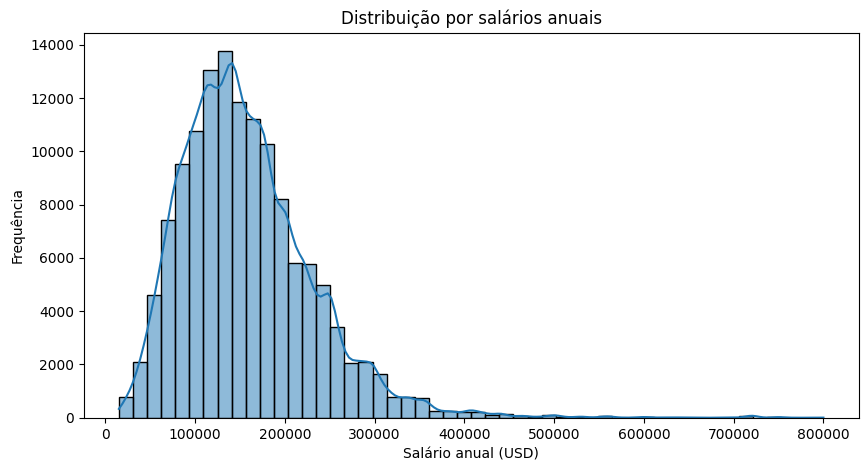

In [25]:
# O parâmetro 'bins' define o intervalo entre as barras que serão geradas
plt.figure(figsize=(10,5))
sns.histplot(df_limpo['usd'], bins= 50, kde=True)
plt.title('Distribuição por salários anuais')
plt.xlabel('Salário anual (USD)')
plt.ylabel('Frequência')
plt.show()

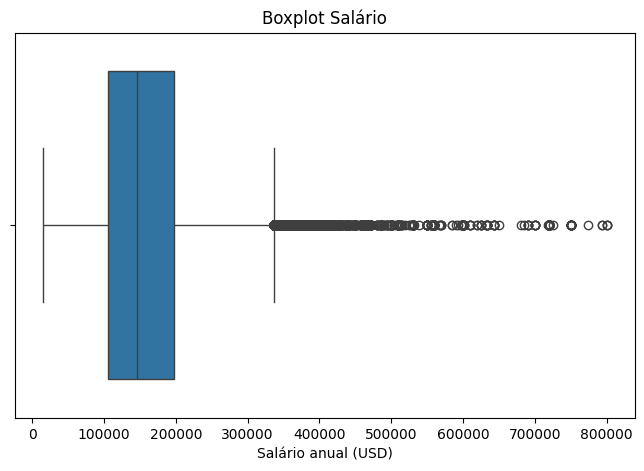

In [26]:
# Cria um boxplot para visualizar a distribuição do salário anual
plt.figure(figsize=(8,5))
sns.boxplot(x = df_limpo['usd'])
plt.title('Boxplot Salário')
plt.xlabel('Salário anual (USD)')
plt.show()

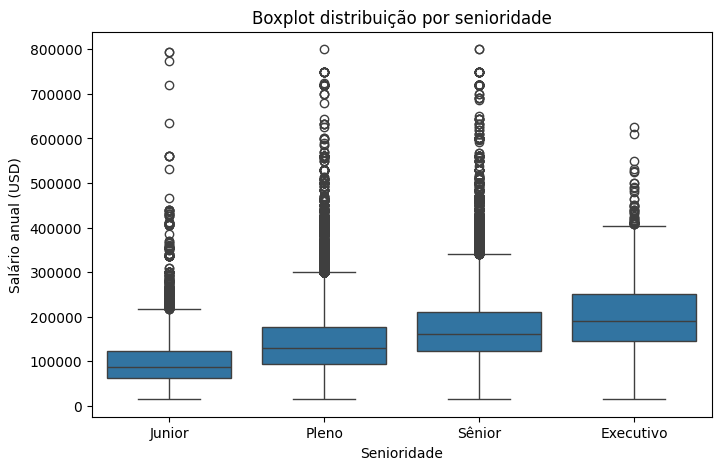

In [27]:
ordem_senioridade = ['Junior', 'Pleno', 'Sênior', 'Executivo']

# Cria um boxplot mostrando a distribuição salarial por senioridade
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y= 'usd', data= df_limpo, order=ordem_senioridade)
plt.title('Boxplot distribuição por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário anual (USD)')
plt.show()

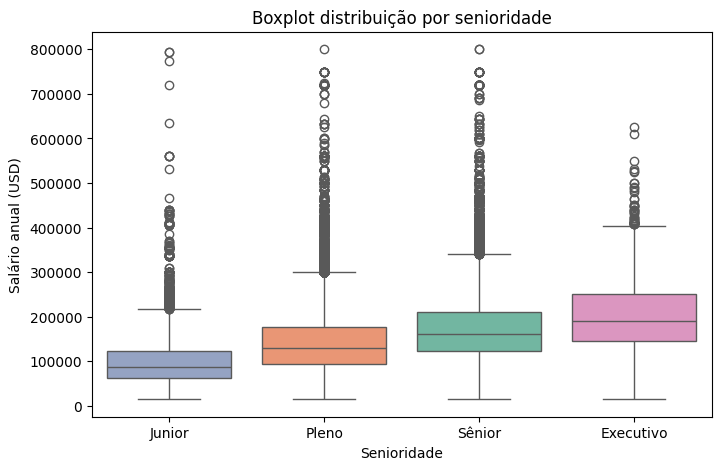

In [28]:
ordem_senioridade = ['Junior', 'Pleno', 'Sênior', 'Executivo']

# Aplica cores diferentes para cada categoria no boxplot da distribuição salarial por senioridade
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y= 'usd', data= df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Boxplot distribuição por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário anual (USD)')
plt.show()

In [41]:
#Importando a biblioteca ploty.express usada para criar gráficos interativos
import plotly.express as px

In [43]:
# calcula a média salarial por nível de senioridade, agrupa o DataFrame df_limpo pela coluna 'senioridade' e encontra a média dos salários em dólares (usd) para cada grupo e ordena esses resultados do maior para o menor
senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
    senioridade_media_salario,
    x='senioridade',
    y='usd',
    title='Média Salarial por Senioridade',
    labels={'senioridade': 'Senioridade', 'usd': 'Média Salarial Anual (USD)'})

fig.show()

In [44]:
#Calcula a frequência de cada tipo de trabalho na coluna 'remoto' do DataFrame e organiza esses dados em um novo DataFrame chamado remoto_contagem com as colunas 'tipo_trabalho' e 'quantidade'
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalo', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names='tipo_trabalo',
    values='quantidade',
    title='Proporção dos tipos de trabalho'
    )

fig.show()

In [45]:
# Modificando a coluna 'remoto'
df_limpo['remoto'] = df_limpo['remoto'].map({
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'})

In [33]:
# Cria um gráfico de pizza com um buraco no centro (efeito donut) para mostrar a proporção dos tipos de trabalho
fig = px.pie(remoto_contagem,
    names='tipo_trabalo',
    values='quantidade',
    title='Proporção dos tipos de trabalho',
    hole=0.5
    )
fig.update_traces(textinfo='percent+label')
fig.show()

In [42]:
# Mapeia os códigos de localização da empresa para nomes de países em português
df_limpo['empresa'] = df_limpo['empresa'].map({
    'US': 'Estados Unidos',
    'GB': 'Reino Unido',
    'CA': 'Canadá',
    'DE': 'Alemanha',
    'IN': 'Índia',
    'ES': 'Espanha',
    'FR': 'França',
    'JP': 'Japão',
    'RU': 'Rússia',
    'PL': 'Polônia',
    'MX': 'México',
    'CH': 'Suíça',
    'TR': 'Turquia',
    'BR': 'Brasil',
    'DK': 'Dinamarca',
    'NL': 'Holanda',
    'IT': 'Itália',
    'SE': 'Suécia',
    'NO': 'Noruega',
    'AU': 'Austrália',
    'BE': 'Bélgica',
    'IE': 'Irlanda',
    'PT': 'Portugal',
    'FI': 'Finlândia',
    'CZ': 'República Tcheca',
    'AT': 'Áustria',
    'GR': 'Grécia',
    'HK': 'Hong Kong',
    'RO': 'Romênia',
    'UA': 'Ucrânia',
    'SG': 'Singapura',
    'HU': 'Hungria',
    'MY': 'Malásia',
    'IS': 'Islândia',
    'NZ': 'Nova Zelândia'
})

# Mapeia os nomes dos cargos para nomes em português
df_limpo['cargo'] = df_limpo['cargo'].map({
    'Data Scientist': 'Cientista de Dados',
    'Data Analyst': 'Analista de Dados',
    'Data Engineer': 'Engenheiro de Dados',
    'Machine Learning Scientist': 'Cientista de Dados de Machine Learning',
    'Research Scientist': 'Cientista de Pesquisa',
    'Software Engineer': 'Engenheiro de Software',
    'Statistician': 'Estatístico',
    'Business Analyst': 'Analista de Negócios',
    'Database Administrator': 'Administrador de Banco de Dados',
    'AI Scientist': 'Cientista de Inteligência Artificial',
    'ML Engineer': 'Engenheiro de Machine Learning',
    'Computer Vision Engineer': 'Engenheiro de Visão Computacional',
    'Statistician II': 'Estatístico Avançado',
    'Data Architect': 'Arquiteto de Dados',
    'Data Modeler': 'Modelo de Dados',
    'Data Warehousing Developer': 'Desenvolvedor de Armazenamento de Dados'
 })

In [35]:
#Salário Médio de Cientistas de Dados por País em gráfico do tipo barras
df_cientista_dados = df_limpo[df_limpo['cargo'] == 'Cientista de Dados']
salario_por_pais = df_cientista_dados.groupby('empresa')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
    salario_por_pais,
    x='empresa',
    y='usd',
    title='Salário Médio de Cientistas de Dados por País',
    labels={'empresa': 'País', 'usd': 'Média Salarial Anual (USD)'}
)

fig.update_layout(xaxis_tickangle=-65)
fig.show()

In [40]:
# Instala a biblioteca pycountry para manipulação de códigos de países
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 64.5 MB/s eta 0:00:00


In [46]:
import pycountry

#Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
  try:
    return pycountry.countries.get(alpha_2=code).alpha_3
  except:
    return None

#Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

#Calcular média salarial por pais (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Cientista de Dados']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().sort_values(ascending=False).reset_index()

#Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [38]:
# Exibe as primeiras linhas do DataFrame para inspeção final
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,FT,NaN,214000,USD,214000,US,Remoto,Estados Unidos,M
1,2025,Sênior,FT,NaN,136000,USD,136000,US,Remoto,Estados Unidos,M
2,2025,Pleno,FT,Engenheiro de Dados,158800,USD,158800,AU,Presencial,Austrália,M
3,2025,Pleno,FT,Engenheiro de Dados,139200,USD,139200,AU,Presencial,Austrália,M
4,2025,Junior,FT,Engenheiro de Dados,90000,USD,90000,US,Presencial,Estados Unidos,M


In [39]:
# Salva o DataFrame limpo em um arquivo CSV
df_limpo.to_csv('dados_imersao_final', index=False)